In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow.keras import datasets

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.imdb.load_data(num_words=1000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(25000,)

In [5]:
vocab = datasets.imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
vocab

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [8]:
max_words = 500
X_train_padded = pad_sequences(X_train,maxlen=max_words)
X_test_padded = pad_sequences(X_test,maxlen=max_words)

In [21]:
model = Sequential()

In [22]:
model.add(Embedding(1000,32,input_length=(max_words)))
model.add(SimpleRNN(100,return_sequences=True))
model.add(SimpleRNN(50,return_sequences=True))
model.add(SimpleRNN(25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train_padded,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 217s 982ms/step - accuracy: 0.5032 - loss: 0.7039 - val_accuracy: 0.5406 - val_loss: 0.6879
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 191s 912ms/step - accuracy: 0.5708 - loss: 0.6715 - val_accuracy: 0.5296 - val_loss: 0.7349
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 835ms/step - accuracy: 0.6034 - loss: 0.6478 - val_accuracy: 0.5982 - val_loss: 0.6553
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 145s 853ms/step - accuracy: 0.7152 - loss: 0.5488 - val_accuracy: 0.6394 - val_loss: 0.6339
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 842ms/step - accuracy: 0.7821 - loss: 0.4627 - val_accuracy: 0.7670 - val_loss: 0.5504
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 836ms/step - accuracy: 0.7845 - loss: 0.4237 - val_accuracy: 0.5228 - val_loss: 0.6973
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 141s 824ms/step - accuracy: 0.5419 - loss: 0.6988 - val_accuracy: 0.5090 - val_loss: 0.7024
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 825ms/step - accuracy: 0.5442 -

In [15]:
history_df = pd.DataFrame(history.history)

In [16]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.66660,0.611124,0.6684,0.596096
1,0.72300,0.548698,0.7252,0.545721
2,0.71855,0.547661,0.6674,0.593690
3,0.73965,0.519678,0.7362,0.533701
4,0.76750,0.481003,0.7402,0.592867
5,0.77650,0.482504,0.7634,0.508070
6,0.77135,0.489934,0.7840,0.478518
7,0.76300,0.494132,0.7618,0.493993
8,0.75960,0.498011,0.7746,0.481519
9,0.78955,0.459699,0.6878,0.586163


<Axes: title={'center': 'accuracy'}>

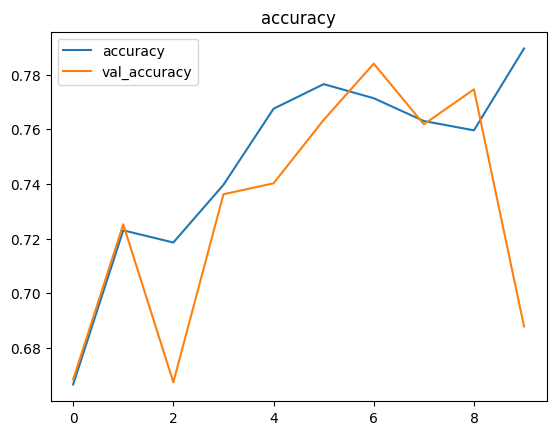

In [19]:
history_df[['accuracy','val_accuracy']].plot(title='accuracy')

<Axes: title={'center': 'loss'}>

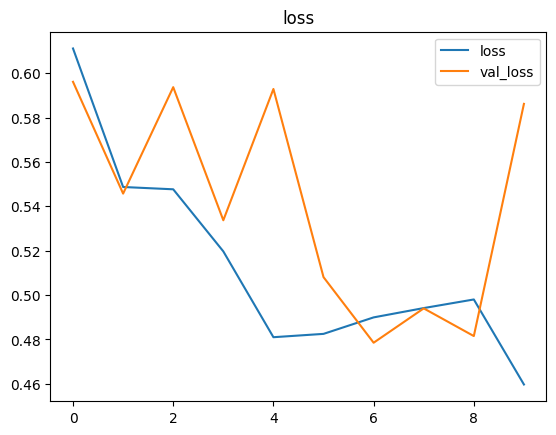

In [20]:
history_df[['loss','val_loss']].plot(title='loss')